In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


data_txt = np.loadtxt('I:/Ricker 25 Hz_02.txt')
wavelag1 = []
for k in range(0,51):
    wavelag1 += [data_txt[k,1]]

    
df = pd.read_csv('I:/更新資料/0705_UD1_1_欄位說明2.csv')
df1 = df.as_matrix(columns=None)
r = []
d = []
for i in range(0,134670):
    r += [df1[i,3]]
    d += [df1[i,0]]

r = np.array(r)
r = r.reshape(670,201)
d = np.array(d)
d = d.reshape(670,201)
r = r.T
d = d.T


Vp = []

C1 = 500;

for i in range(0,670):
    for j in range(0,201):
        Vp += [C1*((np.abs(d[j,i])*r[j,i])**(1/6))]
        
        
Vp = np.array(Vp)
Vp = Vp.reshape(670,201)
Vp = Vp.T

R = []
for i in range(0,670):
    for j in range(0,200):
        R += [(Vp[j+1,i]-Vp[j,i])/(Vp[j+1,i]+Vp[j,i])]
        
        
R = np.array(R)
R = R.reshape(670,200)
R = R.T



F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


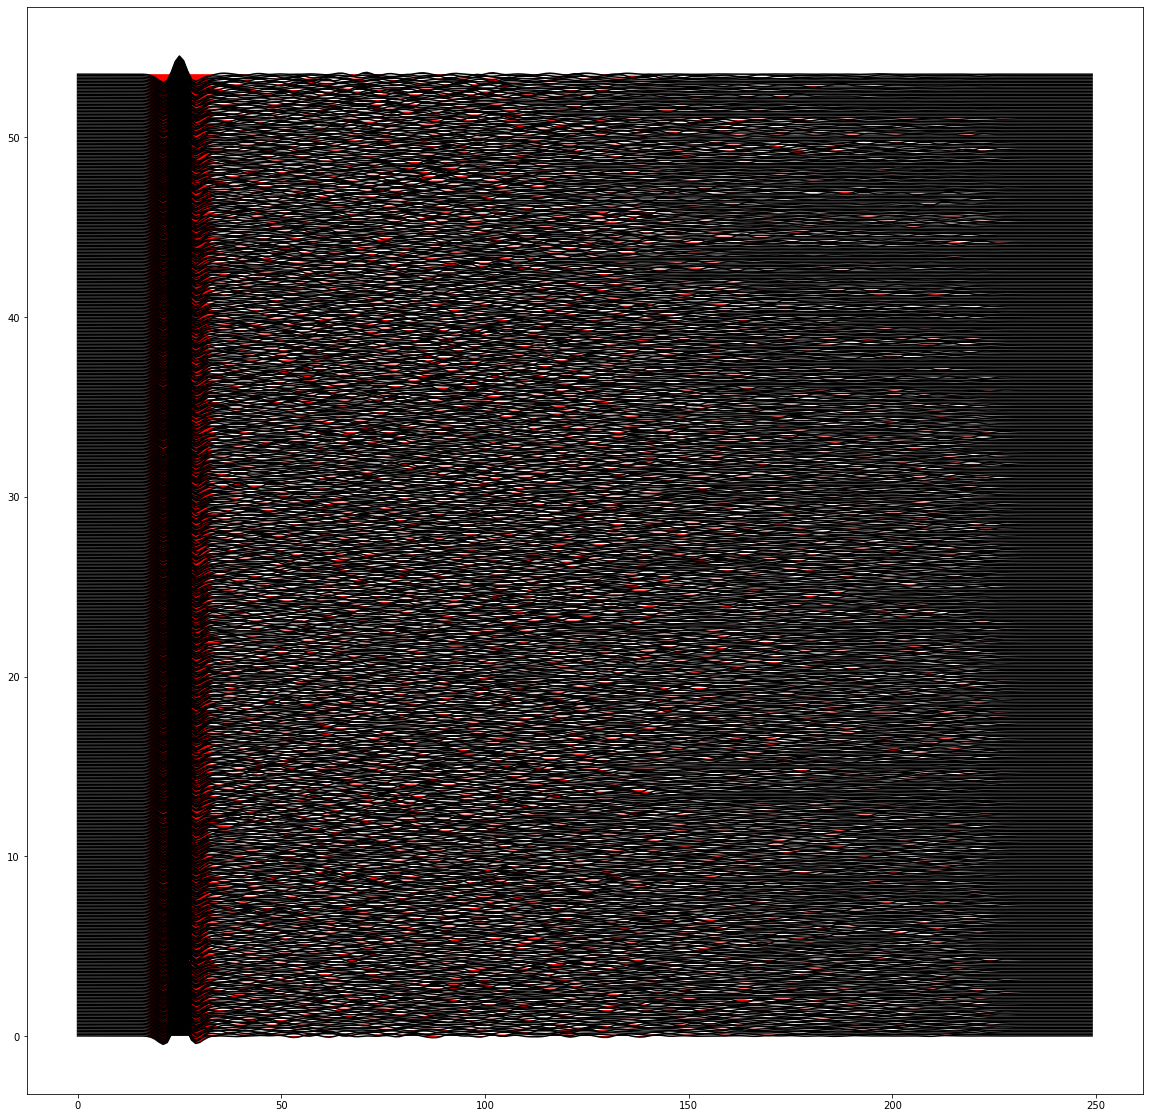

In [9]:
ans = []
fig, (ax1) = plt.subplots(1, 1, sharex=True)

for ii in range(0,670):
    ans += [np.convolve(R[:,ii],wavelag1)+0.08*ii]


ans = np.array(ans)
x = np.arange(0,250)

for ii in range(0,670):
    plt.plot(x,ans[ii,0:],color='black')
    ax1.fill_between(x, ans[ii,0],ans[ii,0:],where= ans[ii,0] >= ans[ii,0:], facecolor='red', interpolate=True)
    ax1.fill_between(x, ans[ii,0],ans[ii,0:],where= ans[ii,0] < ans[ii,0:], facecolor='black', interpolate=True)
    plt.rcParams['figure.figsize'] = (50.0, 50.0)


 

In [5]:
ans

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15],
       [0.3 , 0.3 , 0.3 , ..., 0.3 , 0.3 , 0.3 ],
       ...,
       [2.55, 2.55, 2.55, ..., 2.55, 2.55, 2.55],
       [2.7 , 2.7 , 2.7 , ..., 2.7 , 2.7 , 2.7 ],
       [2.85, 2.85, 2.85, ..., 2.85, 2.85, 2.85]])